In [1]:
import pandas as pd
from scipy.stats import zscore

# Read data from csv
df = pd.read_csv('retail_sales_dataset.csv')

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [2]:
# Identify missing values
print("Missing values:")
df.isnull().sum()

Missing values:


Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [3]:
# Handle if missing value
# drop the row
data_cleaned = df.dropna(subset=['Date','Customer ID','Gender','Age','Product Category','Quantity','Price per Unit'])

# Fill missing 'Total Amount' with (Quantity * Price per Unit)
data_cleaned.loc[:, 'Total Amount'] = data_cleaned['Total Amount'].fillna(data_cleaned['Quantity'] * data_cleaned['Price per Unit'])

# Reset index to reassign sequential row IDs
data_cleaned = data_cleaned.reset_index(drop=True)
# Make 'Transition ID' column sequential:
data_cleaned['Transaction ID'] = data_cleaned.index + 1

# Save the cleaned dataset
file_path = 'retail_sales_dataset.csv'
data_cleaned.to_csv(file_path, index=False)

In [4]:
# additional steps
# Parsing date
df['Date'] = pd.to_datetime(df['Date'])

# Create a new column 'Month'
df['Month'] = df['Date'].dt.strftime('%B')

# Insert 'Month' column at position 2
df.insert(2, 'Month', df.pop('Month'))

print(df)

# save to file
file_path = 'retail_sales_dataset.csv'
df.to_csv(file_path, index=False)

     Transaction ID       Date     Month Customer ID  Gender  Age  \
0                 1 2023-11-24  November     CUST001    Male   34   
1                 2 2023-02-27  February     CUST002  Female   26   
2                 3 2023-01-13   January     CUST003    Male   50   
3                 4 2023-05-21       May     CUST004    Male   37   
4                 5 2023-05-06       May     CUST005    Male   30   
..              ...        ...       ...         ...     ...  ...   
995             996 2023-05-16       May     CUST996    Male   62   
996             997 2023-11-17  November     CUST997    Male   52   
997             998 2023-10-29   October     CUST998  Female   23   
998             999 2023-12-05  December     CUST999  Female   36   
999            1000 2023-04-12     April    CUST1000    Male   47   

    Product Category  Quantity  Price per Unit  Total Amount  
0             Beauty         3              50           150  
1           Clothing         2             50

In [5]:
# Compute Z-scores for 'Total Amount'
df['Z_Score'] = zscore(df['Total Amount'])

# Remove extreme outliers
df = df[df['Z_Score'].abs() <= 3]
df.drop(columns=['Z_Score'], inplace=True)

In [6]:
# Selecting numerical columns
numeric_columns = ["Age", "Quantity", "Price per Unit", "Total Amount"]

In [7]:
# Computing statistics
statistics = df[numeric_columns].describe().T

In [8]:
# Adding additional statistics: range, sum
statistics["range"] = statistics["max"] - statistics["min"]
statistics["sum"] = df[numeric_columns].sum()

In [9]:
# Computing additional statistics: median, mode, standard deviation, and percentiles
additional_stats = pd.DataFrame()

In [10]:
# Median
additional_stats["median"] = df[numeric_columns].median()

In [11]:
# Mode (most frequent value)
mode_values = df[numeric_columns].mode().iloc[0]  # Taking the first mode in case of multiple
additional_stats["mode"] = mode_values

In [12]:
# Standard Deviation (already computed in describe, but adding explicitly)
additional_stats["std_dev"] = df[numeric_columns].std()

In [13]:
# Percentiles (25th and 75th)
additional_stats["25th_percentile"] = df[numeric_columns].quantile(0.25)
additional_stats["75th_percentile"] = df[numeric_columns].quantile(0.75)

In [14]:
# Combine both statistics into a final summary
final_statistics = statistics[["mean", "sum", "range"]].join(additional_stats)

In [15]:
# Display results
final_statistics

,mean,sum,range,median,mode,std_dev,25th_percentile,75th_percentile
Age,41.392,41392,46.0,42.0,43.0,13.681430,29.0,53.0
Quantity,2.514,2514,3.0,3.0,4.0,1.132734,1.0,4.0
Price per Unit,179.890,179890,475.0,50.0,50.0,189.681356,30.0,300.0
Total Amount,456.000,456000,1975.0,135.0,50.0,559.997632,60.0,900.0


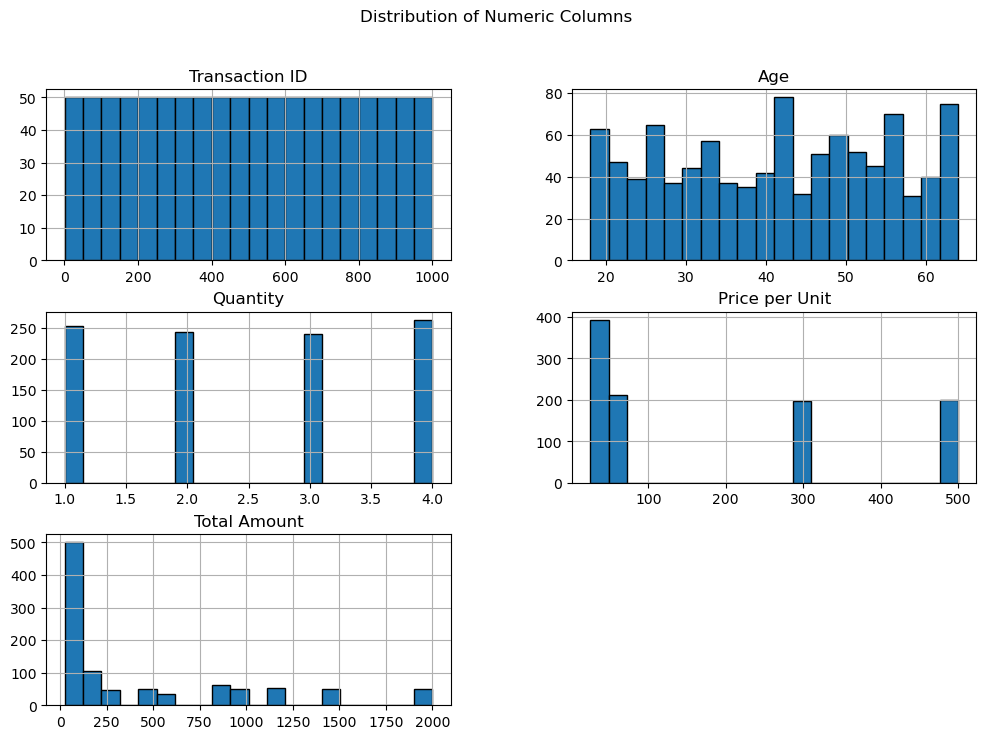

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Numeric Columns - Histogram
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns].hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Distribution of Numeric Columns")
plt.show()

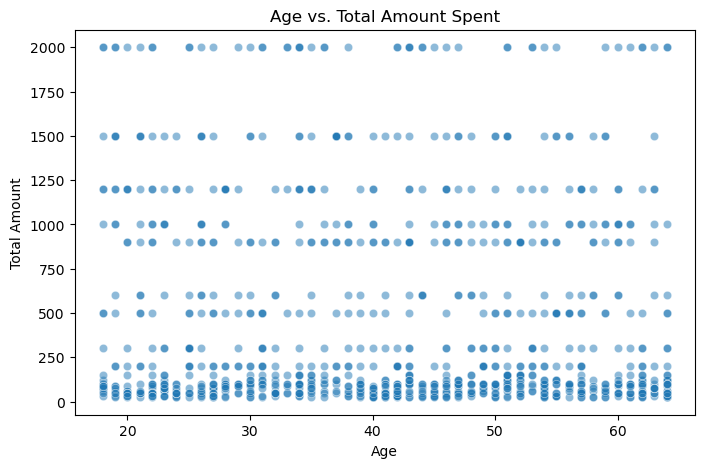

In [17]:
# Relationship Between Age and Total Amount - scatterplot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Age'], y=df['Total Amount'], alpha=0.5)
# Add the title and label
plt.title("Age vs. Total Amount Spent")
plt.xlabel("Age")
plt.ylabel("Total Amount")
plt.show()

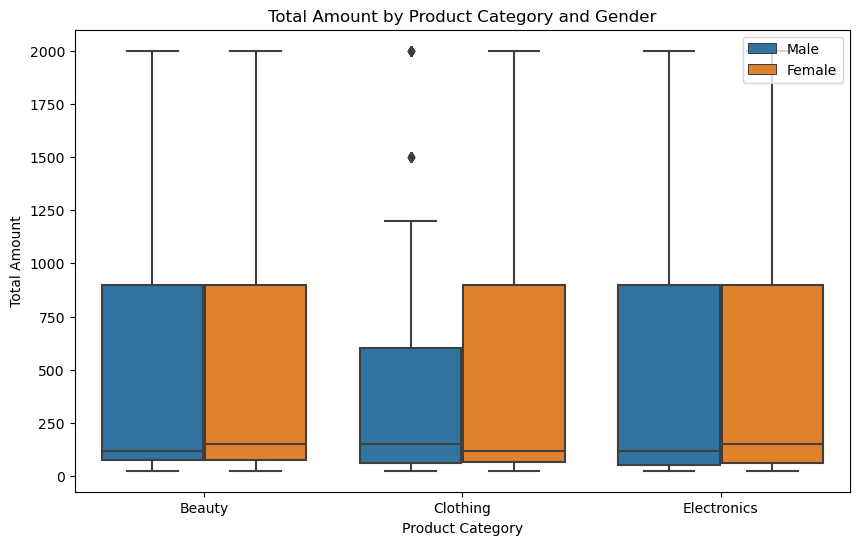

In [18]:
# Total Amount by Product Category and Gender - boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x="Product Category", y="Total Amount", hue="Gender", data=df)
plt.title("Total Amount by Product Category and Gender")
plt.xlabel("Product Category")
plt.ylabel("Total Amount")
plt.legend(loc='upper right')
plt.show()

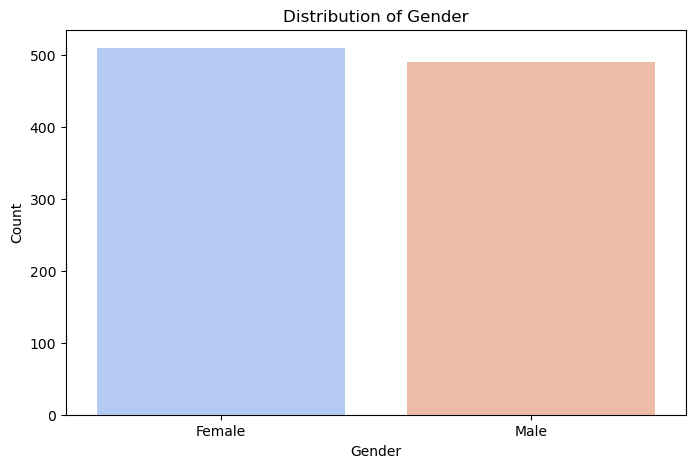

In [19]:
# Distribution of Gender - barplot
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='coolwarm')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [20]:
# Categerization of age group 

# Define the age range
age_bins = [18, 25, 35, 45, 55, 65]    

# Create the labels for each age group
age_group = ['18-24', '25-34', '35-44', '45-54', '55-64'] 

# Categorized the Age into age group
df['Age Group'] = pd.cut(df['Age'], bins = age_bins, labels=age_group,right=False) 

# Dataframe checking
df.head() 

,Transaction ID,Date,Month,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Age Group
0,1,2023-11-24,November,CUST001,Male,34,Beauty,3,50,150,25-34
1,2,2023-02-27,February,CUST002,Female,26,Clothing,2,500,1000,25-34
2,3,2023-01-13,January,CUST003,Male,50,Electronics,1,30,30,45-54
3,4,2023-05-21,May,CUST004,Male,37,Clothing,1,500,500,35-44
4,5,2023-05-06,May,CUST005,Male,30,Beauty,2,50,100,25-34


In [21]:
# Calculate the total amount by age group and save into a new data frame

# Save the Specific data into the 'agegroup_sales' dataframe and make both features as a column
agegroup_sales = df.groupby('Age Group')['Total Amount'].sum().reset_index() 

# Sort the dataframe by the 'Total Amount' spent by gender and product category in descending order(High to Low)
agegroup_sales_sorted = agegroup_sales.sort_values(by='Total Amount',ascending=False)

# Dataframe checking
agegroup_sales_sorted.head() 

,Age Group,Total Amount
3,45-54,97235
1,25-34,97090
2,35-44,96835
4,55-64,90190
0,18-24,74650


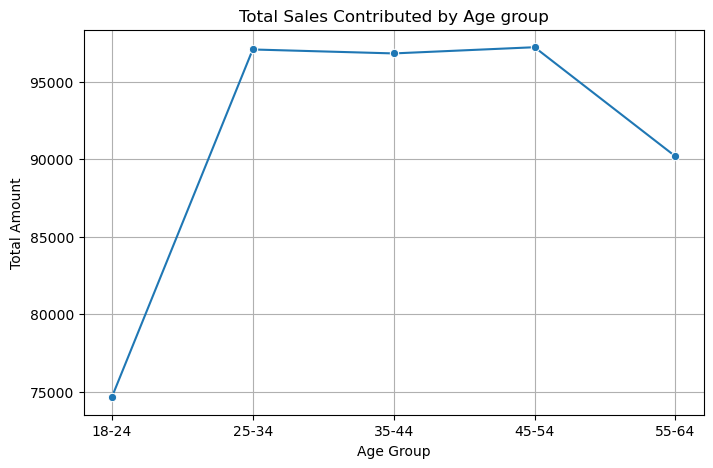

In [22]:
# Visualization of the Total Sales Contributed group by Age group (Line plot) 

plt.figure(figsize=(8, 5))
sns.lineplot(x='Age Group', y='Total Amount', data = agegroup_sales, marker='o')
plt.title('Total Sales Contributed by Age group') 
plt.xlabel('Age Group')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()

In [23]:
# Calculate the Total Amount group by product category and save in a new dataframe

# Save the Specific data into the 'gender_sales' dataframe and make both features as a column
gender_sales = df.groupby('Gender')['Total Amount'].sum().reset_index()

# Dataframe checking
gender_sales.head() 

,Gender,Total Amount
0,Female,232840
1,Male,223160


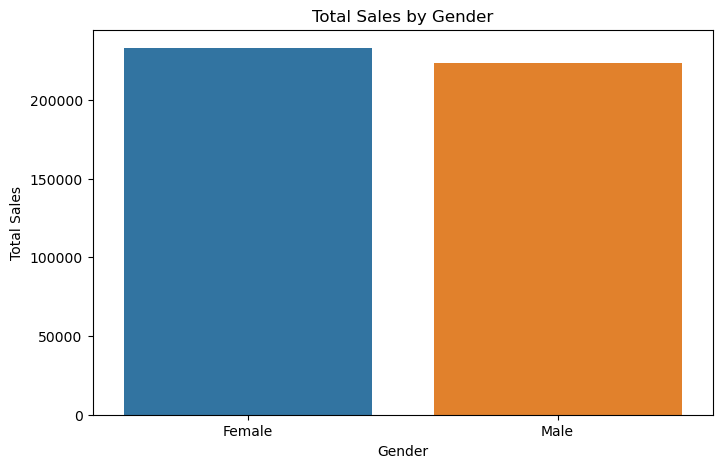

In [24]:
# Visualization of the Total Sales group by gender

plt.figure(figsize=(8, 5))
sns.barplot(x='Gender', y='Total Amount', data=gender_sales)
plt.title('Total Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales')
plt.show()

In [26]:
# Calculate the total amount group by the product category and the total amount and save in a new dataframe

# Save the Specific data into the 'Productcat_gen_sales' dataframe and make both features as a column
Productcat_gen_sales = df.groupby(['Product Category','Gender'])['Total Amount'].sum().reset_index()

# Sort the dataframe by the 'Total Amount' spent by gender and product category in descending order(High to Low)
Productcat_gen_sales_sorted = Productcat_gen_sales.sort_values(by='Total Amount',ascending=False)

# Dataframe checking
Productcat_gen_sales_sorted.head() 

,Product Category,Gender,Total Amount
2,Clothing,Female,81275
5,Electronics,Male,80170
4,Electronics,Female,76735
0,Beauty,Female,74830
3,Clothing,Male,74305


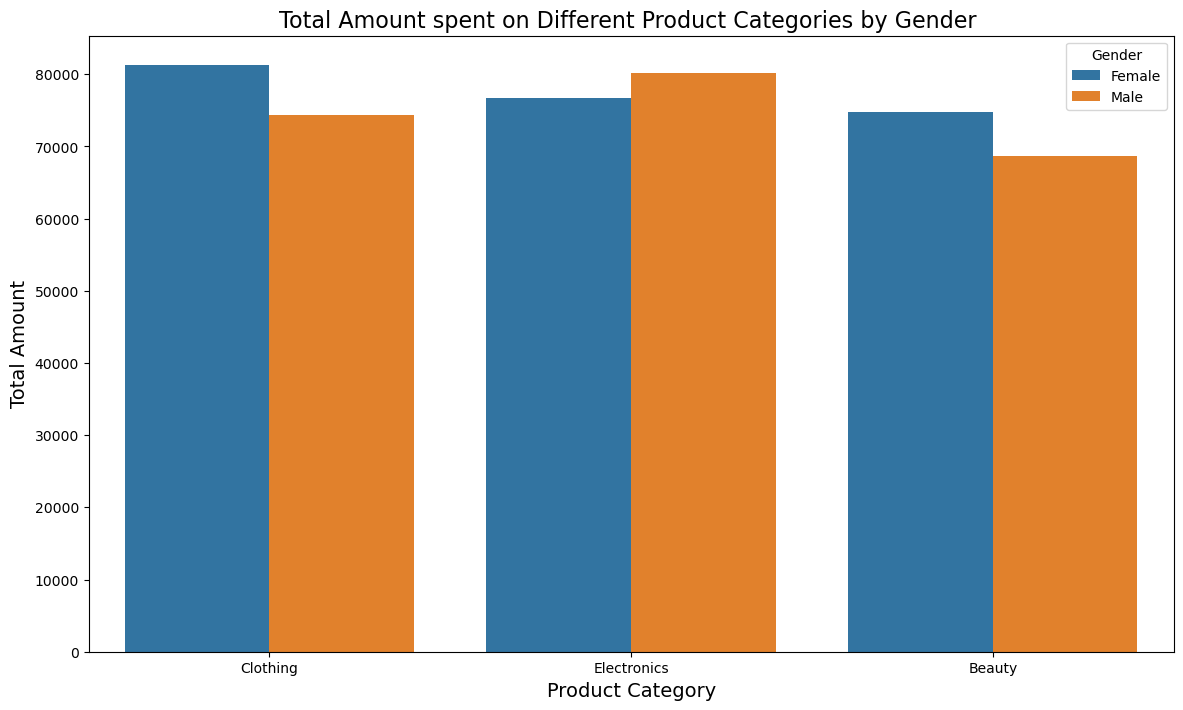

In [28]:
# Visualization of the Total Amount spent on Different Product Categories by Gender 

plt.figure(figsize=(14,8))
sns.barplot(x='Product Category', y='Total Amount',hue='Gender',data=Productcat_gen_sales_sorted)
plt.title('Total Amount spent on Different Product Categories by Gender ', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Total Amount', fontsize=14)
plt.show()

In [30]:
# Calculate the total amount group by the product category and save in a new dataframe

# Save the Specific data into the 'Productcat_sales' dataframe and make both features as a column
Productcat_sales = df.groupby('Product Category')['Total Amount'].sum().reset_index()

# Sort the dataframe by the 'Total Amount' spent by product category in descending order(High to Low)
Productcat_sales_sorted = Productcat_sales.sort_values(by='Total Amount',ascending=False)

# Dataframe checking
Productcat_sales_sorted.head() 

,Product Category,Total Amount
2,Electronics,156905
1,Clothing,155580
0,Beauty,143515


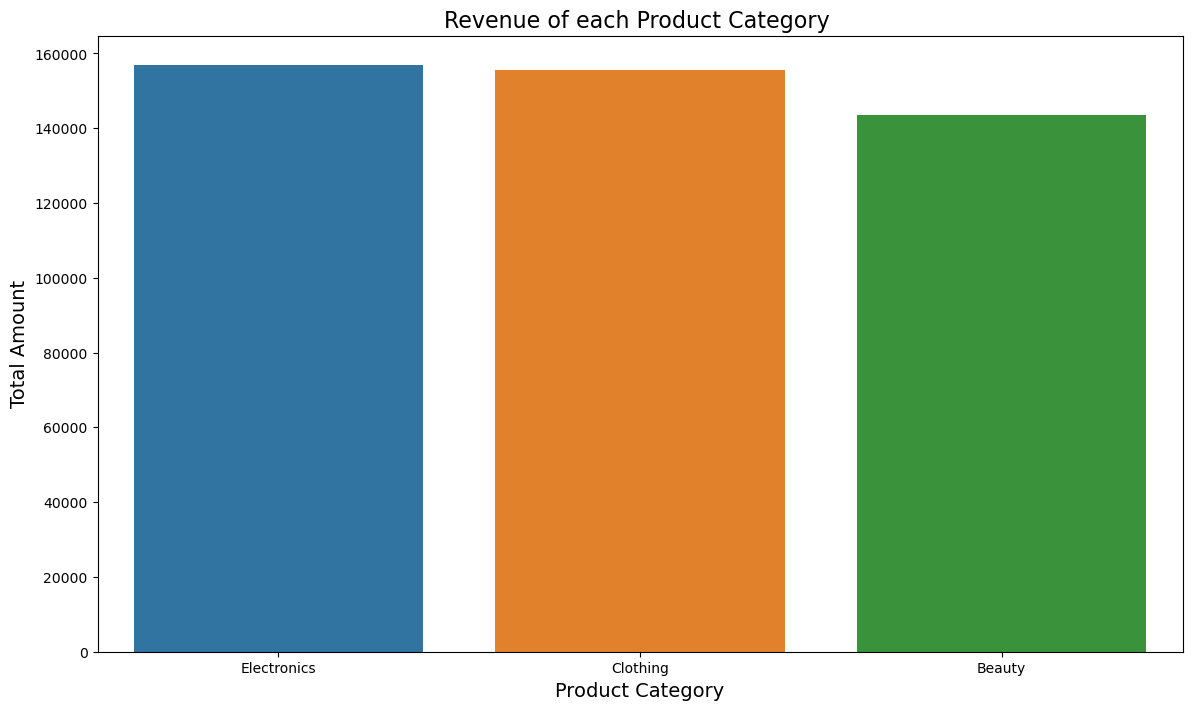

In [32]:
# Visualization of the Renevue of each product category 

plt.figure(figsize=(14,8))
sns.barplot(x='Product Category', y='Total Amount',data=Productcat_sales_sorted)
plt.title('Revenue of each Product Category ', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Total Amount', fontsize=14)
plt.show()

In [34]:
# Calculate the average price per unit group by product category and save in a new dataframe

# Save the Specific data into the 'unitprice_mean' dataframe and make both features as a column
unitprice_mean = df.groupby('Product Category')['Price per Unit'].mean().reset_index()

# Sort the dataframe  by the Average of the Price per Unit in descending order(High to Low)
unitprice_mean_sorted = unitprice_mean.sort_values(by='Price per Unit',ascending=False)

# Dataframe checking
unitprice_mean_sorted.head() 

,Product Category,Price per Unit
0,Beauty,184.055375
2,Electronics,181.900585
1,Clothing,174.287749


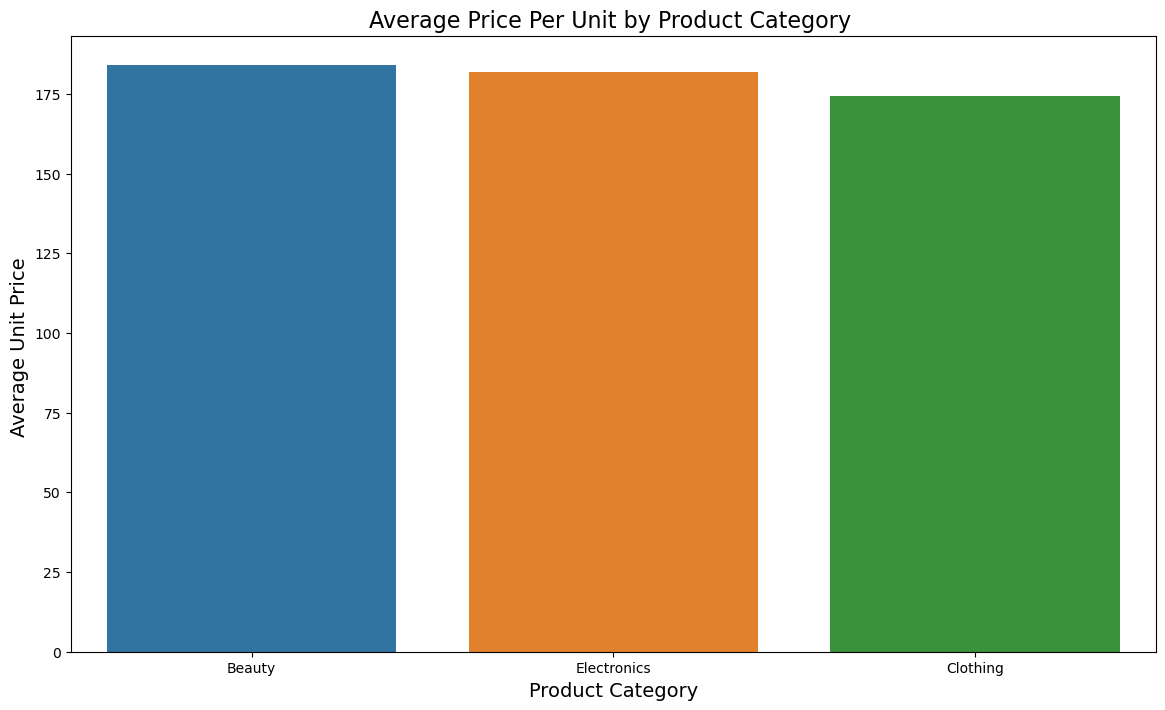

In [36]:
# Visualization of the average price per unit of each product category

plt.figure(figsize=(14,8))
sns.barplot(x='Product Category', y='Price per Unit', data=unitprice_mean_sorted)
plt.title('Average Price Per Unit by Product Category ', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Average Unit Price ', fontsize=14)
plt.show()

In [38]:
category_sales = df.groupby('Product Category').agg({'Total Amount': 'sum', 'Price per Unit': 'mean', 'Quantity': 'sum'}).reset_index()

category_sales.head()

,Product Category,Total Amount,Price per Unit,Quantity
0,Beauty,143515,184.055375,771
1,Clothing,155580,174.287749,894
2,Electronics,156905,181.900585,849


In [40]:
import calendar
# Calculate the monthly sales and save in a new dataframe
monthly_sales = df.groupby('Month')['Total Amount'].sum().reset_index()

# Convert the 'Month' column to categorical with proper order
monthly_sales['Month'] = pd.Categorical(monthly_sales['Month'], categories=calendar.month_name[1:], ordered=True)

# Sort the dataframe by 'Month'
monthly_sales = monthly_sales.sort_values('Month')

# Dataframe checking
monthly_sales.head(12)

,Month,Total Amount
4,January,36980
3,February,44060
7,March,28990
0,April,33870
8,May,53150
6,June,36715
5,July,35465
1,August,36960
11,September,23620
10,October,46580


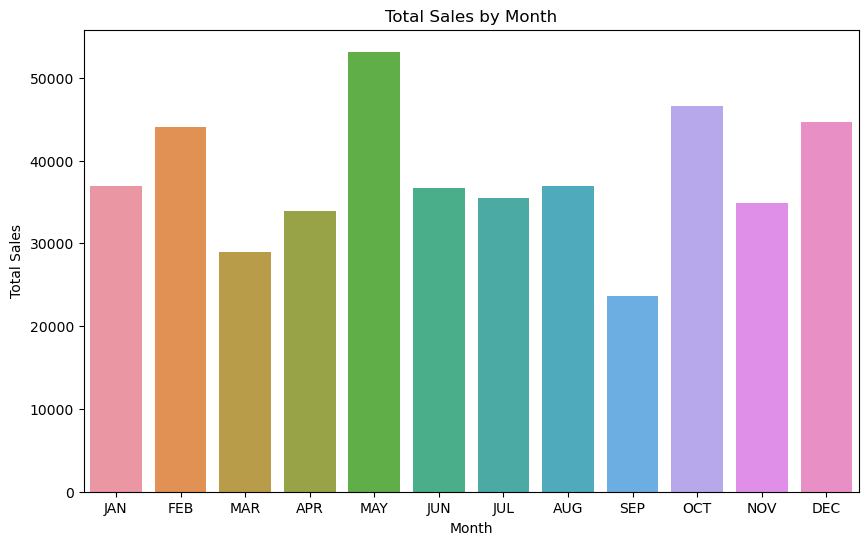

In [42]:
# Visualizaltion of monthly sales 

# Take the first 3 letter of the month name and convert into uppercase
monthly_sales['Month'] = monthly_sales['Month'].str.upper().str.slice(stop=3)

plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Total Amount', data=monthly_sales)
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

In [44]:
# Sort by highest monthly sales 
monthly_highestsales = df.groupby('Month')['Total Amount'].sum().reset_index().sort_values(by='Total Amount', ascending=False)

# Convert the 'Month' column to categorical with proper order
monthly_highestsales['Month'] = pd.Categorical(monthly_highestsales['Month'], categories=calendar.month_name[1:], ordered=True)

# Sort the dataframe by 'Total Amount'
monthly_highestsales = monthly_highestsales.sort_values(by='Total Amount', ascending=False)

# Dataframe checking
monthly_highestsales.head(12)

,Month,Total Amount
8,May,53150
10,October,46580
2,December,44690
3,February,44060
4,January,36980
1,August,36960
6,June,36715
5,July,35465
9,November,34920
0,April,33870


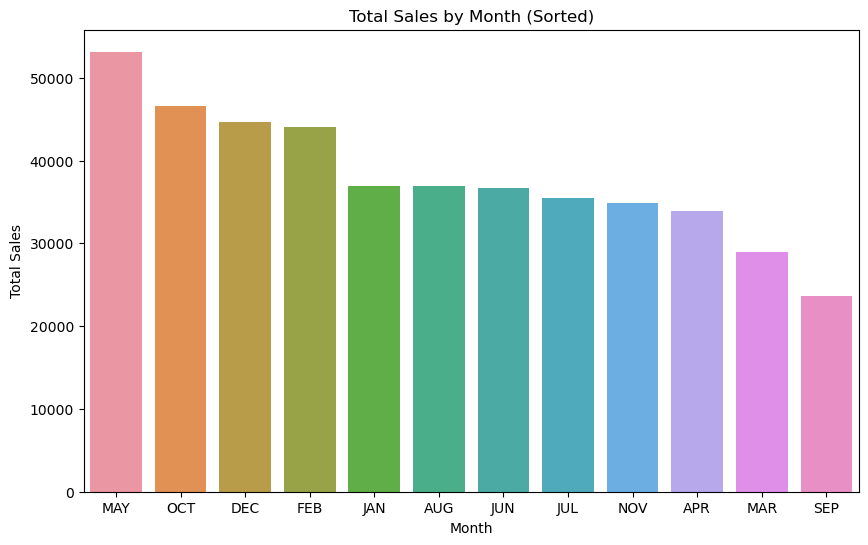

In [48]:
# Visualizaltion of Highest monthly sales 

# Take the first 3 letter of the month name and convert into uppercase 
monthly_highestsales['Month'] = monthly_highestsales['Month'].str.upper().str.slice(stop=3)

plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Total Amount', data=monthly_highestsales)
plt.title('Total Sales by Month (Sorted)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(0, 12))
plt.show()